# Facebook matrixnet

Let's construct the TED subtitles dataset.

In [13]:
import re
import numpy as np
import pickle
import pandas as pd
from bs4 import BeautifulSoup
import urllib
import codecs
import os,glob
import glob
import re

from matplotlib import pyplot as plt

### Matrixnet

Matrix is the dataset crawled from the web and aligned with some probability.

https://github.com/facebookresearch/LASER/tree/master/tasks/WikiMatrix

I've taken the 30k+ sentences from it with prob=1.06 to add to the TED dataset for further evaluation.

In [67]:
mn_zh = "D:\\ml\\matrixnet\\WikiMatrix.ru-zh.txt.cn"
mn_ru = "D:\\ml\\matrixnet\\WikiMatrix.ru-zh.txt.ru"
mn_zh_out = "D:\\ml\\matrixnet\\wm_zh.txt"
mn_ru_out = "D:\\ml\\matrixnet\\wm_ru.txt"

In [68]:
with open(mn_ru, mode='r', encoding='utf-8') as input_ru, open(mn_zh, mode='r', encoding='utf-8') as input_zh, \
        open(mn_ru_out, mode='w', encoding='utf-8') as out_ru, open(mn_zh_out, mode='w', encoding='utf-8') as out_zh:
    zh = input_zh.readlines()
    ru = input_ru.readlines()
    
    for zh,ru in zip(zh,ru):
        if len(ru.split(' ')) > 3 & len(ru.split(' ')) < 46:
            #print(zh, ru)
            out_ru.write(ru)
            out_zh.write(zh)

In [36]:
len_zh = list(map(lambda x: len(x), [x for x in zh if len(x) < 200]))
len_ru = list(map(lambda x: len(x), [x for x in ru if len(x) < 100]))

(array([ 12.,  23.,  49.,  74., 114., 188., 235., 245., 257., 293., 311.,
        319., 342., 403., 379., 400., 372., 387., 374., 215., 423., 398.,
        404., 419., 377., 456., 418., 443., 433., 423., 411., 466., 468.,
        438., 454., 421., 448., 389., 399., 189., 428., 451., 385., 394.,
        389., 412., 440., 405., 373., 417., 434., 426., 404., 364., 373.,
        333., 309., 348., 356., 160., 366., 323., 325., 309., 307., 308.,
        282., 277., 320., 308., 251., 258., 252., 229., 236., 242., 235.,
        227., 222.,  98., 202., 209., 169., 182., 174., 166., 165., 148.,
        165., 121., 143., 120., 123., 118., 124., 115.,  81.,  93., 112.,
         97.]),
 array([  4.  ,   5.95,   7.9 ,   9.85,  11.8 ,  13.75,  15.7 ,  17.65,
         19.6 ,  21.55,  23.5 ,  25.45,  27.4 ,  29.35,  31.3 ,  33.25,
         35.2 ,  37.15,  39.1 ,  41.05,  43.  ,  44.95,  46.9 ,  48.85,
         50.8 ,  52.75,  54.7 ,  56.65,  58.6 ,  60.55,  62.5 ,  64.45,
         66.4 ,  68.35,  70.3 

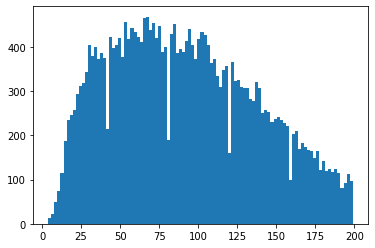

In [37]:
plt.hist(len_zh, bins=100)

(array([  1.,  14.,  61., 113., 349., 331., 424., 497., 537., 632., 563.,
        621., 600., 580., 597., 617., 612., 627., 663., 604., 635., 639.,
        657., 663., 611., 701., 649., 662., 658., 642., 592., 595., 581.,
          0., 583., 573., 567., 544., 520., 502., 484., 467., 467., 399.,
        443., 425., 387., 371., 373., 349., 319., 309., 295., 314., 271.,
        260., 276., 218., 204., 200., 213., 169., 166., 171., 137., 156.,
          0., 145., 137., 157., 116., 122., 116.,  94.,  94.,  88., 113.,
         88.,  77.,  80.,  79.,  62.,  65.,  56.,  57.,  56.,  49.,  52.,
         46.,  44.,  68.,  36.,  44.,  25.,  36.,  22.,  30.,  33.,  21.,
         29.]),
 array([ 2.  ,  2.97,  3.94,  4.91,  5.88,  6.85,  7.82,  8.79,  9.76,
        10.73, 11.7 , 12.67, 13.64, 14.61, 15.58, 16.55, 17.52, 18.49,
        19.46, 20.43, 21.4 , 22.37, 23.34, 24.31, 25.28, 26.25, 27.22,
        28.19, 29.16, 30.13, 31.1 , 32.07, 33.04, 34.01, 34.98, 35.95,
        36.92, 37.89, 38.86, 39.83

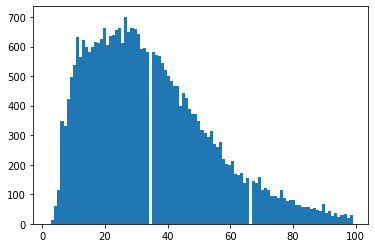

In [38]:
plt.hist(len_ru, bins=100)

In [1]:
#Seems to e traditional characters.